<a href="https://colab.research.google.com/github/arumlim/eileen/blob/master/02_concat%E1%84%80%E1%85%AA_groupby%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%92%E1%85%A1%E1%86%A8%E1%84%89%E1%85%B3%E1%86%B8%E1%84%92%E1%85%A1%E1%84%80%E1%85%A9_%E1%84%89%E1%85%A6%E1%86%A8%E1%84%90%E1%85%A5%E1%84%87%E1%85%A7%E1%86%AF_%E1%84%89%E1%85%AE%E1%84%8B%E1%85%B5%E1%86%A8%E1%84%85%E1%85%B2%E1%86%AF%E1%84%8B%E1%85%B3%E1%86%AF_%E1%84%80%E1%85%AE%E1%84%92%E1%85%A2%E1%84%87%E1%85%A9%E1%84%8C%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import platform
!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
!mv malgun.ttf /usr/share/fonts/truetype/
import matplotlib.font_manager as fm 
fm._rebuild() 
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

--2021-12-04 02:32:11--  https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9595100 (9.2M) [application/octetstream]
Saving to: ‘malgun.ttf’

malgun.ttf          100%[===================>]   9.15M  9.57MB/s    in 1.0s    

2021-12-04 02:32:12 (9.57 MB/s) - ‘malgun.ttf’ saved [9595100/9595100]



In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
# 한국거래소 상장종목 전체
df_KOSPI = fdr.StockListing('KOSPI')
df_KOSPI.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN


### 필요한 데이터 확인하기 

In [ ]:
cor_info = df_KOSPI[df_KOSPI['Name'].isin(['삼성전자','현대차'])]
cor_info = df_KOSPI[(df_KOSPI['Name'] == '삼성전자') | (df_KOSPI['Name'] == '현대차') ]

In [ ]:
삼성전자 = fdr.DataReader('005930', '2018')
현대차 = fdr.DataReader('005380', '2018')
삼성전자.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


#### 새로운 칼럼을 생성합니다. 

In [ ]:
삼성전자['Name'] = '삼성전자'
현대차['Name'] = '현대차'
print(f'현대차 데이터 길이: {len(현대차)}, 삼성전자 데이터 길이: {len(삼성전자)}')
현대차.head()

현대차 데이터 길이: 967, 삼성전자 데이터 길이: 967


,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2018-01-02,150500,153000,149000,149500,731763,-0.041667,현대차
2018-01-03,149000,151000,149000,150500,450874,0.006689,현대차
2018-01-04,150500,151000,146000,146500,931558,-0.026578,현대차
2018-01-05,146000,149000,145500,149000,463695,0.017065,현대차
2018-01-08,148500,151000,147500,151000,482619,0.013423,현대차


## 데이터 결합하기

#### concat

In [ ]:
import pandas as pd
concat_data = pd.concat([삼성전자,현대차])
print(f'concat으로 결합한 데이터 길이: {len(concat_data)}')
concat_data.tail()

concat으로 결합한 데이터 길이: 1934


,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2021-11-29,199500,203500,199500,200500,901640,-0.024331,현대차
2021-11-30,202000,203500,194500,195500,1313581,-0.024938,현대차
2021-12-01,198500,202000,196500,201000,741594,0.028133,현대차
2021-12-02,198500,206000,198000,205500,782923,0.022388,현대차
2021-12-03,205500,208000,204500,206000,512807,0.002433,현대차


#### merge

In [ ]:
cor_info.head()
extract_cor_info = cor_info[[ 'Name','Sector']] # 필요한 칼럼만 추출합니다.

In [ ]:
concat_data.head()

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,삼성전자
2018-01-03,52540,52560,51420,51620,200270,0.011760,삼성전자
2018-01-04,52120,52180,50640,51080,233909,-0.010461,삼성전자
2018-01-05,51300,52120,51200,52120,189623,0.020360,삼성전자
2018-01-08,52400,52520,51500,52020,167673,-0.001919,삼성전자


In [ ]:
merge_data = concat_data.merge(extract_cor_info, on = 'Name', how = 'left')
merge_data.head()

,Open,High,Low,Close,Volume,Change,Name,Sector
0,51380,51400,50780,51020,169485,0.001177,삼성전자,통신 및 방송 장비 제조업
1,52540,52560,51420,51620,200270,0.011760,삼성전자,통신 및 방송 장비 제조업
2,52120,52180,50640,51080,233909,-0.010461,삼성전자,통신 및 방송 장비 제조업
3,51300,52120,51200,52120,189623,0.020360,삼성전자,통신 및 방송 장비 제조업
4,52400,52520,51500,52020,167673,-0.001919,삼성전자,통신 및 방송 장비 제조업


#### 칼럼명 변경하기

In [ ]:
merge_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Name', 'Sector'], dtype='object')

In [ ]:
merge_data.columns = ['시가', '고가', '저자', '종가', '거래량', '수익률', '종목명', '섹터']
merge_data.head()

,시가,고가,저자,종가,거래량,수익률,종목명,섹터
0,51380,51400,50780,51020,169485,0.001177,삼성전자,통신 및 방송 장비 제조업
1,52540,52560,51420,51620,200270,0.011760,삼성전자,통신 및 방송 장비 제조업
2,52120,52180,50640,51080,233909,-0.010461,삼성전자,통신 및 방송 장비 제조업
3,51300,52120,51200,52120,189623,0.020360,삼성전자,통신 및 방송 장비 제조업
4,52400,52520,51500,52020,167673,-0.001919,삼성전자,통신 및 방송 장비 제조업


#### NAN data 확인

In [ ]:
df_KOSPI.isnull().sum()

Symbol               0
Market               0
Name                 0
Sector            4606
Industry          4619
ListingDate       4606
SettleMonth       4606
Representative    4606
HomePage          4636
Region            4606
dtype: int64

In [ ]:
# Nan 데이터 확인하기
df_KOSPI[df_KOSPI['Sector'].isnull()]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN
10,395750,KOSPI,ARIRANG ESG가치주액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7041,005389,KOSPI,현대차3우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7042,005385,KOSPI,현대차우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7058,008775,KOSPI,호텔신라우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7108,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
# NAN 제거
df_KOSPI = df_KOSPI.dropna()
df_KOSPI.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
48,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
49,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
51,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시


#### 요약 통계량 확인하기

In [ ]:
삼성전자.describe()

,Open,High,Low,Close,Volume,Change
count,967.000000,967.000000,967.000000,967.000000,9.670000e+02,967.000000
mean,56951.644261,57514.590486,56372.171665,57088.572906,1.491777e+07,0.000550
std,14385.307466,14495.825163,14291.182409,14007.803527,9.798294e+06,0.016901
min,0.000000,0.000000,0.000000,37450.000000,0.000000e+00,-0.063877
25%,46325.000000,46775.000000,45850.000000,46250.000000,9.080146e+06,-0.009749
50%,51100.000000,51700.000000,50600.000000,51220.000000,1.327607e+07,0.000000
75%,70050.000000,70600.000000,69500.000000,69900.000000,1.873419e+07,0.009964
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.104706


#### index reset

In [ ]:
삼성전자_reset_index = 삼성전자.reset_index()
삼성전자_reset_index.head()

,Date,Open,High,Low,Close,Volume,Change,Name
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,삼성전자
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,삼성전자
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,삼성전자
3,2018-01-05,51300,52120,51200,52120,189623,0.020360,삼성전자
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919,삼성전자


In [ ]:
삼성전자_reset_index['Month'] = 삼성전자_reset_index['Date'].dt.strftime("%Y%m")

In [ ]:
삼성전자_reset_index.head()

,Date,Open,High,Low,Close,Volume,Change,Name,Month
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,삼성전자,201801
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,삼성전자,201801
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,삼성전자,201801
3,2018-01-05,51300,52120,51200,52120,189623,0.020360,삼성전자,201801
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919,삼성전자,201801


In [ ]:
삼성전자_reset_index.groupby('Month').mean().head()

,Open,High,Low,Close,Volume,Change
Month,,,,,,
201801,50166.363636,50720.909091,49431.818182,49982.727273,3.168630e+05,-0.000816
201802,47413.333333,48043.333333,46793.333333,47248.888889,3.517616e+05,-0.003037
201803,49611.428571,50141.904762,49035.238095,49683.809524,2.515379e+05,0.002332
201804,47495.238095,48082.809524,46996.190476,50163.809524,2.497159e+05,0.003700
201805,46107.500000,46535.000000,45347.500000,51102.500000,1.607491e+07,-0.002034


#### Q1. 앞서 본 삼성전자 dataframe을 바탕으로 현대차 연 평균 데이터(Open,High,Low,Close,Volume,Change)를 구해보세요.

#### Kospi 섹터 정보 data handling

In [ ]:
# unique한 값을 확인
df_KOSPI['Sector'].unique() 

array(['산업용 기계 및 장비 임대업', '기타 금융업', '종합 소매업', '봉제의복 제조업',
       '영화, 비디오물, 방송프로그램 제작 및 배급업', '도로 화물 운송업', '기타 식품 제조업',
       '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '금융 지원 서비스업', '보험업', '반도체 제조업',
       '상품 중개업', '건물 건설업', '고무제품 제조업', '1차 비철금속 제조업', '1차 철강 제조업',
       '기타 전문 도매업', '부동산 임대 및 공급업', '유원지 및 기타 오락관련 서비스업', '상품 종합 도매업',
       '전기 및 통신 공사업', '기타 화학제품 제조업', '해상 운송업', '일반 목적용 기계 제조업', '의약품 제조업',
       '유리 및 유리제품 제조업', '기초 화학물질 제조업', '전자부품 제조업', '그외 기타 운송장비 제조업',
       '전기 통신업', '담배 제조업', '기타 정보 서비스업', '통신 및 방송 장비 제조업', '텔레비전 방송업',
       '무기 및 총포탄 제조업', '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '플라스틱제품 제조업',
       '알코올음료 제조업', '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업', '소프트웨어 개발 및 공급업',
       '회사 본부 및 경영 컨설팅 서비스업', '석유 정제품 제조업', '전기업', '자동차 신품 부품 제조업',
       '특수 목적용 기계 제조업', '자동차 부품 및 내장품 판매업', '운송장비 임대업',
       '기초 의약물질 및 생물학적 제제 제조업', '일차전지 및 축전지 제조업', '합성고무 및 플라스틱 물질 제조업',
       '나무제품 제조업', '절연선 및 케이블 제조업', '스포츠 서비스업', '비료, 농약 및 살균, 살충제 제조업',
       '가정용 기기 제조업', '연료용 가스 제조 및 배관공급업', '토목

In [ ]:
grouped_KOSPI_Sector = df_KOSPI.groupby('Sector').count().sort_values('Symbol', ascending = False)
grouped_KOSPI_Sector.head()

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
기타 금융업,56,56,56,56,56,56,56,56,56
자동차 신품 부품 제조업,44,44,44,44,44,44,44,44,44
의약품 제조업,39,39,39,39,39,39,39,39,39
1차 철강 제조업,34,34,34,34,34,34,34,34,34
기타 화학제품 제조업,28,28,28,28,28,28,28,28,28


In [ ]:
KOSPI_Sector_count = grouped_KOSPI_Sector.iloc[:,:1].rename(columns = {'Symbol':'count'})
KOSPI_Sector_count

,count
Sector,
기타 금융업,56
자동차 신품 부품 제조업,44
의약품 제조업,39
1차 철강 제조업,34
기타 화학제품 제조업,28
...,...
악기 제조업,1
제재 및 목재 가공업,1
건물설비 설치 공사업,1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_

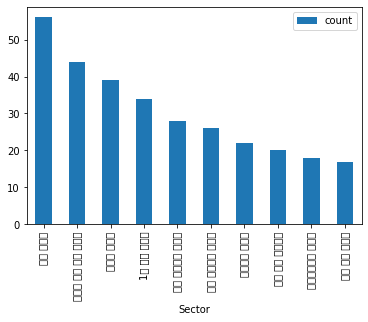

In [ ]:
KOSPI_Sector_count.head(10).plot(kind = 'bar')

#### Q2. KOSPI에 상장 된 지역이 많은 1~3위 지역을 구하고 시각화 해보자.

In [ ]:
df_KOSPI.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
48,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
49,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
51,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시


### 특정 종목을 선택하여 섹터의 수익 확인

In [ ]:
KOSPI_steel = df_KOSPI[df_KOSPI['Sector'] == '1차 철강 제조업']

In [ ]:
import pandas as pd

steel_sector = pd.DataFrame()

for ix, row in KOSPI_steel.iterrows():
    code, name = row['Symbol'], row['Name']
    print(code, name)
    select_df = fdr.DataReader(code, '2021-01-01', '2021-12-04')
    steel_sector[name] = select_df['Close']

069730 DSR제강
016380 KG동부제철
001940 KISCO홀딩스
008260 NI스틸
005490 POSCO
001770 SHD
002710 TCC스틸
002240 고려제강
014280 금강공업
009190 대양금속
084010 대한제강
001230 동국제강
008970 동양철관
004890 동일산업
002690 동일제강
024090 디씨엠
001080 만호제강
008420 문배철강
026940 부국철강
001430 세아베스틸
306200 세아제강
019440 세아특수강
058650 세아홀딩스
139990 아주스틸
058430 포스코강판
071090 하이스틸
000970 한국주철관
104700 한국철강
007280 한국특강
002220 한일철강
004560 현대비앤지스틸
004020 현대제철
133820 화인베스틸
005010 휴스틸


In [ ]:
steel_sector = steel_sector.dropna(axis=1)  # NAN 값이 있는 경우는 제외
steel_sector.head()

,DSR제강,KG동부제철,KISCO홀딩스,NI스틸,POSCO,SHD,TCC스틸,고려제강,금강공업,대양금속,대한제강,동국제강,동양철관,동일산업,동일제강,디씨엠,만호제강,문배철강,부국철강,세아베스틸,세아제강,세아특수강,세아홀딩스,포스코강판,하이스틸,한국주철관,한국철강,한국특강,한일철강,현대비앤지스틸,현대제철,화인베스틸,휴스틸
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,4885,12150,14250,2560,273000,21000,5570,14700,5530,3975,10700,8680,1150,76100,2290,12200,17850,3490,4280,10800,91300,11550,77000,17550,1945,8300,6560,1920,1875,10050,41200,2715,7300
2021-01-05,5150,12950,14500,2775,285000,21700,5760,15000,5650,4145,11300,9130,1220,76300,2322,12200,18300,3945,4350,11600,94500,11550,77400,18200,1960,8350,6750,1935,1945,11150,43550,2800,7510
2021-01-06,5110,13000,14750,2700,280000,21400,5650,14950,5620,4020,12000,9050,1195,77400,2299,12050,18700,3945,4340,11550,101000,11650,77700,17700,1945,8360,6960,1930,1930,10600,42400,2785,7570
2021-01-07,5190,13000,14550,2730,291000,22450,5700,15100,5640,4100,12000,9140,1200,77400,2368,12100,18900,3855,4450,11600,101000,11600,78400,18000,1985,8510,6890,1895,2080,10900,44450,2790,7790
2021-01-08,5150,12650,14250,2805,294500,21950,5560,15050,5970,3955,11700,9270,1170,77000,2359,12200,19200,3875,4400,12000,100500,11600,78700,18450,1985,8490,6900,1885,2085,12250,46750,2770,7680


In [ ]:
# 수익률
steel_earning_rate = (steel_sector / steel_sector.iloc[0]) -1
steel_earning_rate.tail()

,DSR제강,KG동부제철,KISCO홀딩스,NI스틸,POSCO,SHD,TCC스틸,고려제강,금강공업,대양금속,대한제강,동국제강,동양철관,동일산업,동일제강,디씨엠,만호제강,문배철강,부국철강,세아베스틸,세아제강,세아특수강,세아홀딩스,포스코강판,하이스틸,한국주철관,한국철강,한국특강,한일철강,현대비앤지스틸,현대제철,화인베스틸,휴스틸
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-29,-0.071648,-0.176955,0.021053,0.253906,-0.031136,0.238095,0.201077,0.299320,0.415913,0.169811,0.378505,0.705069,0.047826,0.846255,0.170306,1.356557,0.187675,0.054441,-0.088785,0.726852,0.027382,0.363636,0.383117,2.076923,0.372751,0.049398,0.143293,0.479167,0.408000,0.472637,-0.067961,0.025783,0.883562
2021-11-30,-0.119754,-0.210700,-0.010526,0.181641,-0.043956,0.247619,0.166966,0.248299,0.414105,0.171069,0.303738,0.635945,-0.008696,0.819974,0.131004,1.352459,0.154062,-0.024355,-0.119159,0.689815,0.007667,0.333333,0.337662,1.962963,0.290488,0.001205,0.103659,0.479167,0.352000,0.402985,-0.099515,-0.016575,0.821918
2021-12-01,-0.099284,-0.172840,0.014035,0.261719,0.014652,0.261905,0.206463,0.299320,0.439421,0.166038,0.383178,0.756912,0.047826,0.819974,0.157205,1.381148,0.170868,0.025788,-0.089953,0.745370,0.040526,0.350649,0.324675,2.025641,0.341902,0.016867,0.114329,0.513021,0.386667,0.457711,-0.083738,0.038674,0.876712
2021-12-02,-0.082907,-0.160494,0.021053,0.298828,0.031136,0.304762,0.211849,0.336735,0.444846,0.161006,0.448598,0.785714,0.078261,0.833114,0.213974,1.401639,0.212885,0.063037,-0.077103,0.851852,0.044907,0.354978,0.298701,2.122507,0.375321,0.046988,0.137195,0.513021,0.405333,0.542289,-0.012136,0.090239,1.020548
2021-12-03,-0.059365,-0.115226,0.056140,0.328125,0.040293,0.347619,0.253142,0.340136,0.446655,0.227673,0.453271,0.802995,0.121739,0.833114,0.233624,1.536885,0.212885,0.074499,-0.044393,0.888889,0.069003,0.389610,0.370130,2.145299,0.452442,0.059036,0.160061,0.526042,0.477333,0.537313,-0.010922,0.090239,1.047945


In [ ]:
# 21년 12월 3일 기준 수익률
steel_earning_rate.iloc[-1].sort_values(ascending=False)

포스코강판       2.145299
디씨엠         1.536885
휴스틸         1.047945
세아베스틸       0.888889
동일산업        0.833114
동국제강        0.802995
현대비앤지스틸     0.537313
한국특강        0.526042
한일철강        0.477333
대한제강        0.453271
하이스틸        0.452442
금강공업        0.446655
세아특수강       0.389610
세아홀딩스       0.370130
SHD         0.347619
고려제강        0.340136
NI스틸        0.328125
TCC스틸       0.253142
동일제강        0.233624
대양금속        0.227673
만호제강        0.212885
한국철강        0.160061
동양철관        0.121739
화인베스틸       0.090239
문배철강        0.074499
세아제강        0.069003
한국주철관       0.059036
KISCO홀딩스    0.056140
POSCO       0.040293
현대제철       -0.010922
부국철강       -0.044393
DSR제강      -0.059365
KG동부제철     -0.115226
Name: 2021-12-03 00:00:00, dtype: float64

### 기간별 수익률을 확인해보자.

In [ ]:
from datetime import datetime, timedelta

the_day = datetime(2021, 12, 3)
row_dict = {}
for days in [5, 10, 20, 60, 120, 240]:
    start = the_day - timedelta(days)
    end = the_day

    df = steel_sector[start:end] # 특정 기간
    acc_rets = df / df.iloc[0] - 1.0
    row_dict[days] = acc_rets.iloc[-1] 

In [ ]:
df_rets = pd.DataFrame(row_dict)
df_rets

,5,10,20,60,120,240
DSR제강,0.013230,-0.069838,-0.134652,-0.414650,-0.263622,-0.200870
KG동부제철,0.075000,-0.022727,-0.048673,-0.156863,-0.358209,-0.319620
KISCO홀딩스,0.034364,-0.059375,-0.114706,-0.295082,-0.276442,-0.168508
NI스틸,0.059190,-0.074830,-0.083558,-0.092123,-0.311741,-0.140329
POSCO,0.073724,-0.008726,-0.003509,-0.118012,-0.174419,-0.136778
SHD,0.088462,-0.034130,-0.037415,0.125249,0.016158,-0.208392
TCC스틸,0.043348,-0.029207,-0.127500,-0.157005,0.085537,0.449637
고려제강,0.031414,-0.031941,-0.185950,-0.307557,-0.184265,-0.179167
금강공업,0.021711,-0.007444,0.013942,0.005025,-0.025579,0.393728
대양금속,0.049462,-0.039370,-0.082707,0.015609,-0.133215,0.191697


In [ ]:
# 섹터 전체 기간별 수익률
df_rets.mean()

5      0.001334
10    -0.052483
20    -0.085151
60    -0.036099
120   -0.047569
240    0.455012
dtype: float64

In [ ]:
# 수익률이 -인 경우 붉은 표시
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

# 섹터 중 수익률이 가장 높았 던 종목
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_rets.style.\
    applymap(color_negative_red).\
    apply(highlight_max)


,5,10,20,60,120,240
DSR제강,0.050955,-0.117647,-0.149485,0.328502,0.229508,0.746032
KG동부제철,-0.003922,-0.076364,-0.099291,-0.223242,-0.368159,0.123894
KISCO홀딩스,-0.028103,-0.039352,-0.025822,0.040100,0.053299,0.431034
NI스틸,0.044059,-0.071259,-0.111364,-0.173362,-0.301786,0.275693
POSCO,-0.006211,-0.030303,-0.076479,-0.073806,-0.071118,0.194030
SHD,0.000000,-0.101786,-0.098566,-0.111307,-0.167219,-0.043726
TCC스틸,0.010870,-0.048864,-0.043429,0.094118,0.769556,0.722222
고려제강,0.001757,-0.068627,-0.135053,0.069418,0.089866,0.979167
금강공업,-0.020101,-0.033457,-0.063625,-0.006369,-0.032258,0.436464
대양금속,0.017690,-0.063218,-0.110909,-0.131439,-0.140598,0.241117


#### Q. 종목 하나를 선택하여 섹터를 확인하고 해당 섹터의 수익률을 계산해보자.

### 섹터별 수익률 비교하기

In [ ]:
# 구글 드라이브 경로에서 read하기 위한 경로로 수정합니다.
def chage_google_drive(drive_path):
  result_path = url2='https://drive.google.com/uc?id=' + drive_path.split('/')[-2]
  return result_path

# data의 공유 path를 불러옵니다.
share_path_2021 = 'https://drive.google.com/file/d/1NJ8-UILbYOV04XUbsNw_opp21Npl1ZgR/view?usp=sharing'

# 데이터를 read합니다.
data_2020 = pd.read_csv(chage_google_drive(share_path_2021))

In [ ]:
# data_2020 = pd.read_csv('./data/marcap-2021.csv.gz', dtype={'Code':str}, parse_dates=['Date'])

In [ ]:
import FinanceDataReader as fdr

df_master = fdr.StockListing('KRX')
df_master.head(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [ ]:
len(df_master)

7113

In [ ]:
df_master = df_master.dropna(subset=['Sector'])
df_master

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7106,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7107,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
7110,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7111,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [ ]:
# "종목마스터"(df_master)에서 종목코드(Symbol)와 섹터(Sector) 데이터만 활용합니다.
df_master[['Symbol', 'Sector']]

,Symbol,Sector
0,060310,전자부품 제조업
1,095570,산업용 기계 및 장비 임대업
2,006840,기타 금융업
3,054620,기타 금융업
4,265520,특수 목적용 기계 제조업
...,...,...
7106,189980,비알코올음료 및 얼음 제조업
7107,000540,보험업
7110,003280,해상 운송업
7111,037440,"건축기술, 엔지니어링 및 관련 기술 서비스업"


In [ ]:
df = pd.merge(data_2020[['Code', 'Name', 'Marcap','Date']], df_master[['Symbol', 'Sector']], left_on='Code', right_on="Symbol")
df

,Code,Name,Marcap,Date,Symbol,Sector
0,005930,삼성전자,4.954920e+14,2021-01-04,005930,통신 및 방송 장비 제조업
1,005930,삼성전자,5.008648e+14,2021-01-05,005930,통신 및 방송 장비 제조업
2,005930,삼성전자,4.907161e+14,2021-01-06,005930,통신 및 방송 장비 제조업
3,005930,삼성전자,4.948950e+14,2021-01-07,005930,통신 및 방송 장비 제조업
4,005930,삼성전자,5.301167e+14,2021-01-08,005930,통신 및 방송 장비 제조업
...,...,...,...,...,...,...
512622,389030,지니너스,1.456488e+11,2021-11-08,389030,자연과학 및 공학 연구개발업
512623,389030,지니너스,1.391272e+11,2021-11-09,389030,자연과학 및 공학 연구개발업
512624,389030,지니너스,1.320622e+11,2021-11-10,389030,자연과학 및 공학 연구개발업
512625,376300,디어유,1.340057e+12,2021-11-10,376300,소프트웨어 개발 및 공급업


In [ ]:
marcap_sector = pd.pivot_table(df, index='Date', columns='Sector', values='Marcap', aggfunc='sum')
marcap_sector

Sector,1차 비철금속 제조업,1차 철강 제조업,가구 제조업,가전제품 및 정보통신장비 소매업,가정용 기기 제조업,"가죽, 가방 및 유사제품 제조업",개인 및 가정용품 임대업,건물 건설업,건물설비 설치 공사업,"건축기술, 엔지니어링 및 관련 기술 서비스업","건축자재, 철물 및 난방장치 도매업","경비, 경호 및 탐정업",고무제품 제조업,"곡물가공품, 전분 및 전분제품 제조업","골판지, 종이 상자 및 종이용기 제조업","과실, 채소 가공 및 저장 처리업",광고업,교육지원 서비스업,"구조용 금속제품, 탱크 및 증기발생기 제조업",귀금속 및 장신용품 제조업,그외 기타 개인 서비스업,그외 기타 운송장비 제조업,"그외 기타 전문, 과학 및 기술 서비스업",그외 기타 제품 제조업,금속 주조업,금융 지원 서비스업,기계장비 및 관련 물품 도매업,기록매체 복제업,기반조성 및 시설물 축조관련 전문공사업,기초 의약물질 및 생물학적 제제 제조업,기초 화학물질 제조업,기타 과학기술 서비스업,기타 교육기관,기타 금속 가공제품 제조업,기타 금융업,기타 비금속 광물제품 제조업,기타 비금속광물 광업,기타 사업지원 서비스업,기타 상품 전문 소매업,기타 생활용품 소매업,...,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",자연과학 및 공학 연구개발업,작물 재배업,재 보험업,전구 및 조명장치 제조업,전기 및 통신 공사업,전기 통신업,전기업,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전문디자인업,전자부품 제조업,절연선 및 케이블 제조업,제재 및 목재 가공업,종합 소매업,"증기, 냉·온수 및 공기조절 공급업",직물직조 및 직물제품 제조업,창작 및 예술관련 서비스업,철도장비 제조업,초등 교육기관,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외",컴퓨터 및 주변장치 제조업,컴퓨터 및 통신장비 수리업,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",텔레비전 방송업,토목 건설업,통신 및 방송 장비 제조업,특수 목적용 기계 제조업,"펄프, 종이 및 판지 제조업",편조원단 제조업,편조의복 제조업,폐기물 처리업,플라스틱제품 제조업,합성고무 및 플라스틱 물질 제조업,항공 여객 운송업,"항공기,우주선 및 부품 제조업",해상 운송업,"해체, 선별 및 원료 재생업",화학섬유 제조업,환경 정화 및 복원업,회사 본부 및 경영 컨설팅 서비스업
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1.134583e+13,3.832214e+13,2.803683e+12,7.754968e+11,2.051288e+12,9.370929e+11,8.750559e+11,1.058565e+13,1.247257e+11,7.065273e+12,1.487167e+11,3.233730e+12,7.182909e+12,1.123274e+12,1.751617e+12,1.437906e+11,5.723273e+12,1.396414e+11,5.614096e+12,3.536284e+11,5.402132e+12,2.711976e+11,4.134841e+12,1.110804e+12,2.342931e+11,2.423436e+13,3.854971e+12,1.334658e+11,4.403495e+11,1.215597e+14,1.079304e+14,5.764156e+11,2.068446e+11,2.498139e+12,1.427057e+14,2.624064e+12,1.758909e+11,1.254720e+12,3.462689e+12,5.400993e+10,...,8.719165e+13,4.091405e+13,2.271425e+11,9.340643e+11,5.955970e+11,1.926063e+12,3.218888e+13,1.789701e+13,1.181543e+13,2.049859e+11,5.797876e+13,1.811544e+12,2.451256e+11,1.798870e+13,4.689391e+11,5.111563e+11,2.277589e+11,2.144646e+12,6.300953e+11,4.192852e+12,1.894258e+12,2.026570e+09,2.174563e+13,5.977570e+12,8.618999e+12,5.352987e+14,3.736168e+13,1.699536e+12,2.214000e+10,3.909386e+10,1.489706e+12,8.705143e+12,5.162485e+12,1.174623e+13,4.707634e+12,9.327088e+12,8.176541e+10,4.694502e+12,7.387761e+10,6.785154e+12
2021-01-05,1.243702e+13,4.003185e+13,2.810592e+12,7.835167e+11,2.077345e+12,9.469043e+11,8.660809e+11,1.121485e+13,1.246715e+11,7.234392e+12,1.506531e+11,3.362927e+12,7.287913e+12,1.143487e+12,1.745699e+12,1.458621e+11,5.734320e+12,1.399473e+11,5.707002e+12,3.528445e+11,5.379992e+12,2.655910e+11,4.169406e+12,1.121777e+12,2.358163e+11,2.477442e+13,3.854081e+12,1.331280e+11,4.556981e+11,1.230498e+14,1.094656e+14,5.836068e+11,2.101043e+11,2.555853e+12,1.454151e+14,2.631369e+12,1.771962e+11,1.237114e+12,3.465695e+12,5.341750e+10,...,8.685562e+13,4.148561e+13,2.321997e+11,9.316570e+11,6.331939e+11,1.924050e+12,3.303924e+13,1.788967e+13,1.200036e+13,2.060959e+11,5.787188e+13,1.819693e+12,2.439171e+11,1.837719e+13,4.672023e+11,5.127840e+11,2.257214e+11,2.362931e+12,6.318563e+11,4.133328e+12,2.016344e+12,1.964690e+09,2.377588e+13,6.096554e+12,8.997359e+12,5.402727e+14,3.769913e+13,1.702776e+12,2.208000e+10,3.811205e+10,1.477945e+12,8.770301e+12,5.111429e+12,1.205677e+13,4.848551e+12,9.516735e+12,9.501791e+10,4.714117e+12,7.440910e+10,6.604603e+12
2021-01-06,1.217526e+13,3.943358e+13,2.797245e+12,7.959275e+11,2.051658e+12,9.629425e+11,8.615935e+11,1.128566e+13,1.252160e+11,7.141842e+12,1.541387e+11,3.309728e+12,7.166480e+12,1.143200e+12,1.759426e+12,1.467764e+11,5.717022e+12,1.407630e+11,5.646697e+12,3.565164e+11,5.343092e+12,2.625886e+11,4.121821e+12,1.110159e+12,2.376340e+11,2.548741e+13,3.922127e+12,1.308088e+11,4.560679e+11,1.219957e+14,1.090497e+14,5.742322e+11,2.062519e+11,2.544554e+12,1.478578e+14,2.586081e+12,1.755646e+11,1.243580e+12,3.463608e+12,5.025787e+10,...,8.668598e+13,4.137317e+13,2.328167e+11,9.316570e+11,6.346829e+11,1.925087e+12,3.354559e+13,1.803695e+13,1.17

### 누적 수익률 계산하기

In [ ]:
df_PROFIT = marcap_sector.pct_change(1).dropna()

In [ ]:
df_PROFIT_ACC = (1+df_PROFIT).cumprod()-1 
df_PROFIT_ACC

Sector,1차 비철금속 제조업,1차 철강 제조업,가구 제조업,가전제품 및 정보통신장비 소매업,가정용 기기 제조업,"가죽, 가방 및 유사제품 제조업",개인 및 가정용품 임대업,건물 건설업,건물설비 설치 공사업,"건축기술, 엔지니어링 및 관련 기술 서비스업","건축자재, 철물 및 난방장치 도매업","경비, 경호 및 탐정업",고무제품 제조업,"곡물가공품, 전분 및 전분제품 제조업","골판지, 종이 상자 및 종이용기 제조업","과실, 채소 가공 및 저장 처리업",광고업,교육지원 서비스업,"구조용 금속제품, 탱크 및 증기발생기 제조업",귀금속 및 장신용품 제조업,그외 기타 개인 서비스업,그외 기타 운송장비 제조업,"그외 기타 전문, 과학 및 기술 서비스업",그외 기타 제품 제조업,금속 주조업,금융 지원 서비스업,기계장비 및 관련 물품 도매업,기록매체 복제업,기반조성 및 시설물 축조관련 전문공사업,기초 의약물질 및 생물학적 제제 제조업,기초 화학물질 제조업,기타 과학기술 서비스업,기타 교육기관,기타 금속 가공제품 제조업,기타 금융업,기타 비금속 광물제품 제조업,기타 비금속광물 광업,기타 사업지원 서비스업,기타 상품 전문 소매업,기타 생활용품 소매업,...,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",자연과학 및 공학 연구개발업,작물 재배업,재 보험업,전구 및 조명장치 제조업,전기 및 통신 공사업,전기 통신업,전기업,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전문디자인업,전자부품 제조업,절연선 및 케이블 제조업,제재 및 목재 가공업,종합 소매업,"증기, 냉·온수 및 공기조절 공급업",직물직조 및 직물제품 제조업,창작 및 예술관련 서비스업,철도장비 제조업,초등 교육기관,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외",컴퓨터 및 주변장치 제조업,컴퓨터 및 통신장비 수리업,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",텔레비전 방송업,토목 건설업,통신 및 방송 장비 제조업,특수 목적용 기계 제조업,"펄프, 종이 및 판지 제조업",편조원단 제조업,편조의복 제조업,폐기물 처리업,플라스틱제품 제조업,합성고무 및 플라스틱 물질 제조업,항공 여객 운송업,"항공기,우주선 및 부품 제조업",해상 운송업,"해체, 선별 및 원료 재생업",화학섬유 제조업,환경 정화 및 복원업,회사 본부 및 경영 컨설팅 서비스업
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.096176,0.044614,0.002464,0.010342,0.012703,0.010470,-0.010256,0.059439,-0.000434,0.023937,0.013021,0.039953,0.014619,0.017995,-0.003378,0.014406,0.001930,0.002191,0.016549,-0.002217,-0.004098,-0.020674,0.008359,0.009878,0.006501,0.022285,-0.000231,-0.002531,0.034855,0.012258,0.014224,0.012476,0.015759,0.023103,0.018986,0.002784,0.007421,-0.014032,0.000868,-0.010969,...,-0.003854,0.013970,0.022264,-0.002577,0.063125,-0.001045,0.026418,-0.000410,0.015651,0.005415,-0.001843,0.004498,-0.004930,0.021596,-0.003704,0.003184,-0.008946,0.101781,0.002795,-0.014197,0.064450,-0.030534,0.093363,0.019905,0.043898,0.009292,0.009032,0.001906,-0.002710,-0.025114,-0.007895,0.007485,-0.009890,0.026437,0.029934,0.020333,0.162080,0.004178,0.007194,-0.026610
2021-01-06,0.073105,0.029003,-0.002296,0.026345,0.000181,0.027585,-0.015385,0.066129,0.003932,0.010837,0.036458,0.023502,-0.002287,0.017739,0.004458,0.020765,-0.001092,0.008032,0.005807,0.008167,-0.010929,-0.031744,-0.003149,-0.000581,0.014260,0.051705,0.017421,-0.019908,0.035695,0.003587,0.010370,-0.003788,-0.002865,0.018580,0.036103,-0.014475,-0.001855,-0.008879,0.000265,-0.069470,...,-0.005799,0.011222,0.024981,-0.002577,0.065625,-0.000507,0.042148,0.007819,-0.006229,-0.001266,-0.011345,0.027944,0.048964,0.013319,-0.004938,0.004591,-0.007917,0.114504,0.009057,-0.024052,0.081228,-0.053435,0.064178,0.016291,0.044131,-0.010783,0.008299,-0.003319,0.000000,-0.045662,-0.010882,0.005677,-0.025259,0.022695,0.048503,-0.023555,0.297043,0.004450,0.010791,-0.026813
2021-01-07,0.088177,0.062639,0.005745,0.070330,0.018016,0.024379,-0.014103,0.088162,0.006698,0.021552,0.028646,0.028202,0.008331,0.036843,0.020603,0.075210,0.019764,-0.003650,0.008445,0.033308,0.002732,0.004746,-0.000561,0.014086,0.028445,0.075864,0.028522,-0.014086,0.039445,0.008146,0.073507,0.010627,0.002865,0.027588,0.084538,-0.005169,-0.005566,-0.004489,0.021174,-0.073126,...,0.000481,0.000490,0.029774,0.019330,0.090296,0.004084,0.098748,0.005586,0.035568,0.019416,0.002544,0.020261,0.032207,0.049126,-0.001235,0.009020,-0.013066,0.104326,0.001604,-0.001441,0.080257,0.064885,0.067754,0.026156,0.056694,0.001129,0.026986,0.009855,0.000000,-0.050228,-0.002348,0.029581,-0.023061,0.028829,0.050338,-0.016020,0.323953,0.034858,0.010791,-0.020399
2021-01-08,0.081539,0.078092,0.014486,0.085977,0.008784,0.028790,-0.010256,0.093949,0.004631,0.016121,0.041667,0.041128,0.032922,0.030643,-0.003771,0.058816,0.021801,-0.042200,-0.004572,0.020242,0.012295,0.001173,-0.016229,0.017824,0.015105,0.085562,0.027070,-0.012205,0.033985,0.026315,0.096840,0.011139,-0.020057,0.027218,0.084705,-0.003940,-0.001671,-0.023773,0.020764,-0.071298,...,0.075070,-0.021071,0.031399,0.012887,0.032672,-0.001579,0.083549,0.004120,0.047716,0.0237

In [ ]:
cumulative_return = df_PROFIT_ACC.iloc[-1,:].sort_values()
worst_top10 = cumulative_return.head(10)
best_top10 = cumulative_return.tail(10)

In [ ]:
worst_top10

Sector
자동차 재제조 부품 제조업           -0.335423
의약품 제조업                  -0.283517
합성고무 및 플라스틱 물질 제조업       -0.263146
기타 전문 도매업                -0.252251
자연과학 및 공학 연구개발업          -0.202847
사업시설 유지·관리 서비스업          -0.193483
의료용품 및 기타 의약 관련제품 제조업    -0.176056
교육지원 서비스업                -0.173309
기타 종이 및 판지 제품 제조업        -0.167015
그외 기타 전문, 과학 및 기술 서비스업   -0.165439
Name: 2021-11-10, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_

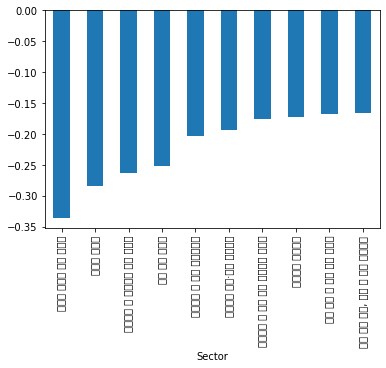

In [ ]:
worst_top10.plot(kind = 'bar')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49353 missing from current font.
  font.set_

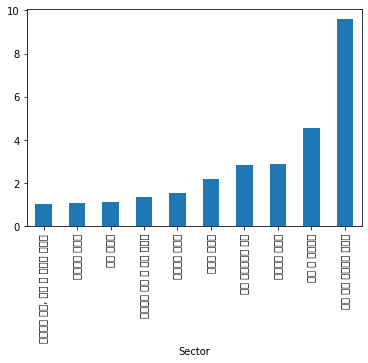

In [ ]:
best_top10.plot(kind = 'bar')

### log 수익률 계산

In [ ]:
import numpy as np #3.월별 log 수익률 계산 df_LOG_PROFIT = np.log(df_PROFIT+1) df_LOG_PROFIT

df_LOG_PROFIT = np.log(df_PROFIT+1) 
df_LOG_PROFIT.head()

Sector,1차 비철금속 제조업,1차 철강 제조업,가구 제조업,가전제품 및 정보통신장비 소매업,가정용 기기 제조업,"가죽, 가방 및 유사제품 제조업",개인 및 가정용품 임대업,건물 건설업,건물설비 설치 공사업,"건축기술, 엔지니어링 및 관련 기술 서비스업","건축자재, 철물 및 난방장치 도매업","경비, 경호 및 탐정업",고무제품 제조업,"곡물가공품, 전분 및 전분제품 제조업","골판지, 종이 상자 및 종이용기 제조업","과실, 채소 가공 및 저장 처리업",광고업,교육지원 서비스업,"구조용 금속제품, 탱크 및 증기발생기 제조업",귀금속 및 장신용품 제조업,그외 기타 개인 서비스업,그외 기타 운송장비 제조업,"그외 기타 전문, 과학 및 기술 서비스업",그외 기타 제품 제조업,금속 주조업,금융 지원 서비스업,기계장비 및 관련 물품 도매업,기록매체 복제업,기반조성 및 시설물 축조관련 전문공사업,기초 의약물질 및 생물학적 제제 제조업,기초 화학물질 제조업,기타 과학기술 서비스업,기타 교육기관,기타 금속 가공제품 제조업,기타 금융업,기타 비금속 광물제품 제조업,기타 비금속광물 광업,기타 사업지원 서비스업,기타 상품 전문 소매업,기타 생활용품 소매업,...,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",자연과학 및 공학 연구개발업,작물 재배업,재 보험업,전구 및 조명장치 제조업,전기 및 통신 공사업,전기 통신업,전기업,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전문디자인업,전자부품 제조업,절연선 및 케이블 제조업,제재 및 목재 가공업,종합 소매업,"증기, 냉·온수 및 공기조절 공급업",직물직조 및 직물제품 제조업,창작 및 예술관련 서비스업,철도장비 제조업,초등 교육기관,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외",컴퓨터 및 주변장치 제조업,컴퓨터 및 통신장비 수리업,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",텔레비전 방송업,토목 건설업,통신 및 방송 장비 제조업,특수 목적용 기계 제조업,"펄프, 종이 및 판지 제조업",편조원단 제조업,편조의복 제조업,폐기물 처리업,플라스틱제품 제조업,합성고무 및 플라스틱 물질 제조업,항공 여객 운송업,"항공기,우주선 및 부품 제조업",해상 운송업,"해체, 선별 및 원료 재생업",화학섬유 제조업,환경 정화 및 복원업,회사 본부 및 경영 컨설팅 서비스업
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.091827,0.043648,0.002461,0.010289,0.012623,0.010416,-0.010309,0.057740,-0.000434,0.023655,0.012937,0.039176,0.014513,0.017835,-0.003384,0.014303,0.001928,0.002188,0.016413,-0.002219,-0.004107,-0.020890,0.008325,0.009830,0.006480,0.022040,-0.000231,-0.002535,0.034262,0.012184,0.014123,0.012398,0.015636,0.022840,0.018808,0.002780,0.007394,-0.014131,0.000868,-0.011030,...,-0.003861,0.013873,0.022020,-0.002581,0.061212,-0.001045,0.026075,-0.000410,0.015530,0.005401,-0.001845,0.004488,-0.004942,0.021366,-0.003711,0.003179,-0.008986,0.096928,0.002791,-0.014298,0.062459,-0.031010,0.089259,0.019710,0.042962,0.009249,0.008992,0.001905,-0.002714,-0.025435,-0.007926,0.007457,-0.009939,0.026094,0.029494,0.020129,0.150211,0.004170,0.007168,-0.026970
2021-01-06,-0.021271,-0.015058,-0.004760,0.015716,-0.012442,0.016796,-0.005195,0.006294,0.004358,-0.012876,0.022873,-0.015946,-0.016803,-0.000251,0.007832,0.006249,-0.003021,0.005811,-0.010623,0.010353,-0.006882,-0.011369,-0.011478,-0.010411,0.007679,0.028373,0.017502,-0.017574,0.000811,-0.008604,-0.003807,-0.016194,-0.018506,-0.004431,0.016658,-0.017361,-0.009251,0.005213,-0.000602,-0.060971,...,-0.001955,-0.002714,0.002654,0.000000,0.002349,0.000539,0.015209,0.008199,-0.021778,-0.006668,-0.009565,0.023073,0.052745,-0.008135,-0.001240,0.001401,0.001038,0.011481,0.006225,-0.010048,0.015638,-0.023906,-0.027056,-0.003550,0.000223,-0.020090,-0.000727,-0.005229,0.002714,-0.021303,-0.003015,-0.001796,-0.015644,-0.003653,0.017869,-0.043966,0.109876,0.000270,0.003565,-0.000209
2021-01-07,0.013948,0.032165,0.008027,0.041963,0.017675,-0.003124,0.001301,0.020457,0.002751,0.010544,-0.007566,0.004582,0.010586,0.018598,0.015945,0.051964,0.020664,-0.011656,0.002619,0.024632,0.013718,0.036994,0.002593,0.014569,0.013889,0.022711,0.010852,0.005923,0.003614,0.004533,0.060614,0.014366,0.005731,0.008805,0.045688,0.009398,-0.003724,0.004420,0.020688,-0.003937,...,0.006297,-0.010670,0.004666,0.021726,0.022888,0.004583,0.052888,-0.002219,0.041198,0.020497,0.013950,-0.007502,-0.016104,0.034726,0.003715,0.004400,-0.005203,-0.009174,-0.007413,0.022904,-0.000898,0.117783,0.003355,0.009660,0.011960,0.011970,0.018364,0.013132,0.000000,-0.004796,0.008591,0.023490,0.002252,0.005980,0.001749,0.007687,0.020535,0.029825,0.000000,0.006569
2021-01-08,-0.006119,0.014438,0.008654,0.014513,-0.009110,0.004297,0.003894,0.005304,-0.002055,-0.005331,0.012579,0.012493,0.024095,-0.005998,-0.024171,-0.015365,0.001996,-0.039460,-0.012992,-0.012726,0.009492,-0.003563,-0.015801,0.003679,-0.013056,0.008974,-0.001412,0.001906,-0.005267,0.017862,0.021503,0.000507,-0.023122,-0.000360,0.000154,0.001235,0.003909,-0.019561,-0.000402,0.001970,...,0.071905,-0.021785,0.001576,-0.006341,-0.054300,-0.005656,-0.013930,-

In [ ]:
df_LOG_PROFIT_ACC = df_LOG_PROFIT.cumsum() 
df_LOG_PROFIT_ACC.head()

Sector,1차 비철금속 제조업,1차 철강 제조업,가구 제조업,가전제품 및 정보통신장비 소매업,가정용 기기 제조업,"가죽, 가방 및 유사제품 제조업",개인 및 가정용품 임대업,건물 건설업,건물설비 설치 공사업,"건축기술, 엔지니어링 및 관련 기술 서비스업","건축자재, 철물 및 난방장치 도매업","경비, 경호 및 탐정업",고무제품 제조업,"곡물가공품, 전분 및 전분제품 제조업","골판지, 종이 상자 및 종이용기 제조업","과실, 채소 가공 및 저장 처리업",광고업,교육지원 서비스업,"구조용 금속제품, 탱크 및 증기발생기 제조업",귀금속 및 장신용품 제조업,그외 기타 개인 서비스업,그외 기타 운송장비 제조업,"그외 기타 전문, 과학 및 기술 서비스업",그외 기타 제품 제조업,금속 주조업,금융 지원 서비스업,기계장비 및 관련 물품 도매업,기록매체 복제업,기반조성 및 시설물 축조관련 전문공사업,기초 의약물질 및 생물학적 제제 제조업,기초 화학물질 제조업,기타 과학기술 서비스업,기타 교육기관,기타 금속 가공제품 제조업,기타 금융업,기타 비금속 광물제품 제조업,기타 비금속광물 광업,기타 사업지원 서비스업,기타 상품 전문 소매업,기타 생활용품 소매업,...,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",자연과학 및 공학 연구개발업,작물 재배업,재 보험업,전구 및 조명장치 제조업,전기 및 통신 공사업,전기 통신업,전기업,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",전문디자인업,전자부품 제조업,절연선 및 케이블 제조업,제재 및 목재 가공업,종합 소매업,"증기, 냉·온수 및 공기조절 공급업",직물직조 및 직물제품 제조업,창작 및 예술관련 서비스업,철도장비 제조업,초등 교육기관,"측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외",컴퓨터 및 주변장치 제조업,컴퓨터 및 통신장비 수리업,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",텔레비전 방송업,토목 건설업,통신 및 방송 장비 제조업,특수 목적용 기계 제조업,"펄프, 종이 및 판지 제조업",편조원단 제조업,편조의복 제조업,폐기물 처리업,플라스틱제품 제조업,합성고무 및 플라스틱 물질 제조업,항공 여객 운송업,"항공기,우주선 및 부품 제조업",해상 운송업,"해체, 선별 및 원료 재생업",화학섬유 제조업,환경 정화 및 복원업,회사 본부 및 경영 컨설팅 서비스업
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.091827,0.043648,0.002461,0.010289,0.012623,0.010416,-0.010309,0.057740,-0.000434,0.023655,0.012937,0.039176,0.014513,0.017835,-0.003384,0.014303,0.001928,0.002188,0.016413,-0.002219,-0.004107,-0.020890,0.008325,0.009830,0.006480,0.022040,-0.000231,-0.002535,0.034262,0.012184,0.014123,0.012398,0.015636,0.022840,0.018808,0.002780,0.007394,-0.014131,0.000868,-0.011030,...,-0.003861,0.013873,0.022020,-0.002581,0.061212,-0.001045,0.026075,-0.000410,0.015530,0.005401,-0.001845,0.004488,-0.004942,0.021366,-0.003711,0.003179,-0.008986,0.096928,0.002791,-0.014298,0.062459,-0.031010,0.089259,0.019710,0.042962,0.009249,0.008992,0.001905,-2.713706e-03,-0.025435,-0.007926,0.007457,-0.009939,0.026094,0.029494,0.020129,0.150211,0.004170,0.007168,-0.026970
2021-01-06,0.070556,0.028590,-0.002299,0.026004,0.000181,0.027211,-0.015504,0.064034,0.003924,0.010779,0.035809,0.023230,-0.002290,0.017583,0.004448,0.020552,-0.001093,0.008000,0.005790,0.008134,-0.010989,-0.032259,-0.003154,-0.000581,0.014159,0.050413,0.017271,-0.020109,0.035073,0.003580,0.010317,-0.003795,-0.002869,0.018409,0.035467,-0.014581,-0.001857,-0.008918,0.000265,-0.072001,...,-0.005816,0.011159,0.024674,-0.002581,0.063561,-0.000507,0.041284,0.007789,-0.006248,-0.001267,-0.011410,0.027561,0.047803,0.013231,-0.004951,0.004580,-0.007948,0.108409,0.009016,-0.024346,0.078097,-0.054916,0.062203,0.016159,0.043185,-0.010841,0.008264,-0.003325,5.290907e-17,-0.046737,-0.010942,0.005661,-0.025583,0.022441,0.047363,-0.023837,0.260087,0.004440,0.010734,-0.027179
2021-01-07,0.084504,0.060755,0.005728,0.067967,0.017856,0.024087,-0.014203,0.084490,0.006675,0.021323,0.028243,0.027812,0.008296,0.036181,0.020393,0.072516,0.019571,-0.003657,0.008410,0.032766,0.002729,0.004735,-0.000561,0.013988,0.028048,0.073124,0.028123,-0.014186,0.038687,0.008113,0.070931,0.010571,0.002861,0.027214,0.081154,-0.005183,-0.005581,-0.004499,0.020953,-0.075938,...,0.000481,0.000489,0.029340,0.019145,0.086449,0.004076,0.094172,0.005570,0.034950,0.019230,0.002540,0.020059,0.031699,0.047957,-0.001235,0.008980,-0.013152,0.099235,0.001602,-0.001442,0.077199,0.062867,0.065558,0.025819,0.055145,0.001128,0.026628,0.009807,5.290907e-17,-0.051534,-0.002351,0.029152,-0.023331,0.028421,0.049112,-0.016150,0.280622,0.034265,0.010734,-0.020610
2021-01-08,0.078385,0.075193,0.014383,0.082480,0.008746,0.028384,-0.010309,0.089794,0.004620,0.015992,0.040822,0.040305,0.032392,0.030183,-0.003778,0.057152,0.021567,-0.043117,-0.004583,0.020040,0.012220,0.001172,-0.016362,0.017667,0.014992,0.082097,0.026710,-0.012280,0.033420,0.025975,0.092433,0.011078,-0.020261,0.026854,0.081308,-0.003948,-0.001673,-0.024060,0.020552,-0.073967,...,0.072386,-0.021296,0.030916,0.012804,0.032149,-0.001580,0.080242,0.004112,0.0

In [ ]:
cumulative_log_return = df_LOG_PROFIT_ACC.iloc[-1,:].sort_values()

In [ ]:
worst_log_top10 = cumulative_log_return.head(10)
best_log_top10 = cumulative_log_return.tail(10)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_

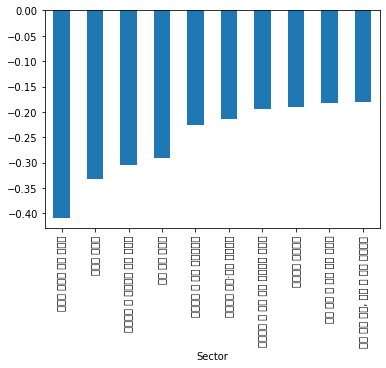

In [ ]:
worst_log_top10.plot(kind = 'bar')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49353 missing from current font.
  font.set_

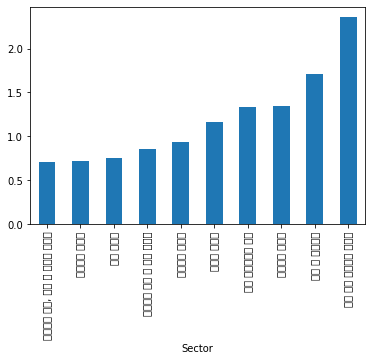

In [ ]:
best_log_top10.plot(kind = 'bar')

### Q3. 원하는 종목을 하나 선택하여 섹터의 수익률을 확인해보자.